In [222]:
#importing the dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [223]:
#loading the dataset
df = pd.read_csv("glass_data.csv")

##### Let's do something to find out the data information.

In [224]:
df.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [225]:
# No. of rows and columns
df.shape

(214, 11)

In [226]:
#To know the no. of elements in each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [227]:
# Checking for null values in each attribute
df.isnull().sum()

Id_number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [228]:
# let's try to see the names of the columns
df.columns


Index(['Id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_glass'],
      dtype='object')

In [229]:
# Now let's check the data type of each attribute
df.dtypes

Id_number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_glass      int64
dtype: object

In [230]:
# Let's have some statistical view of the data
df.describe()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [231]:
#Counts the no. of each class label
df['Type_of_glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type_of_glass, dtype: int64

In [232]:
#let's drop the id_number column
df1 = df.drop(['Id_number'], axis=1)

In [233]:
df1.shape

(214, 10)

In [234]:
features = df1.columns[:-1].tolist()
features

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

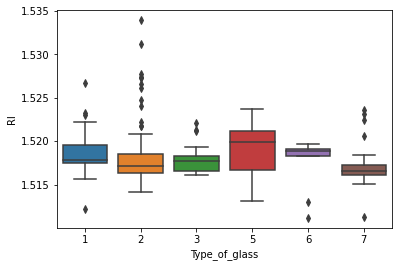

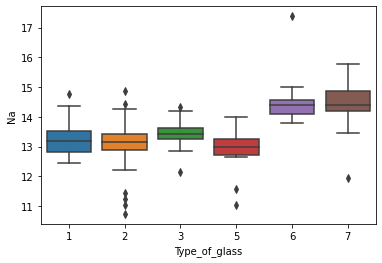

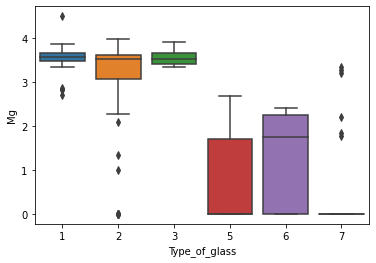

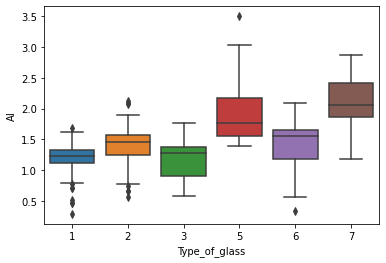

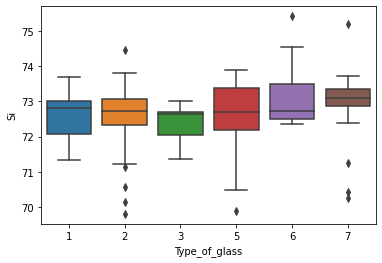

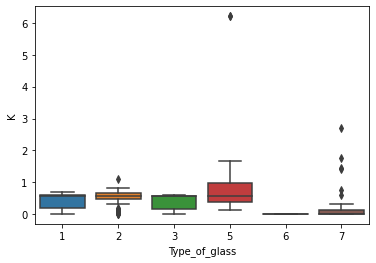

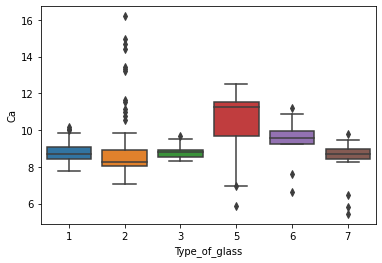

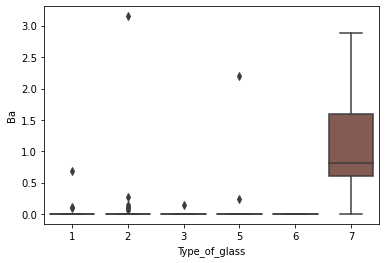

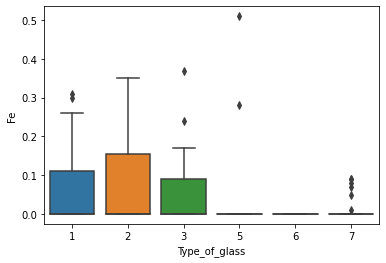

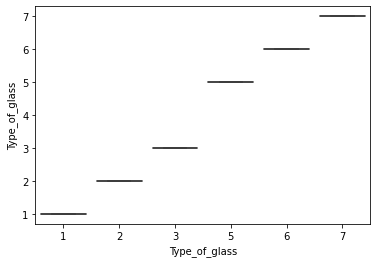

In [235]:
#Outlier Analysis
attr = df1.columns
for i in attr:
    fig = plt.figure()
    ax = sns.boxplot(x='Type_of_glass', y=i, data = df1)

##### Multivariate Plotting

<Figure size 720x720 with 0 Axes>

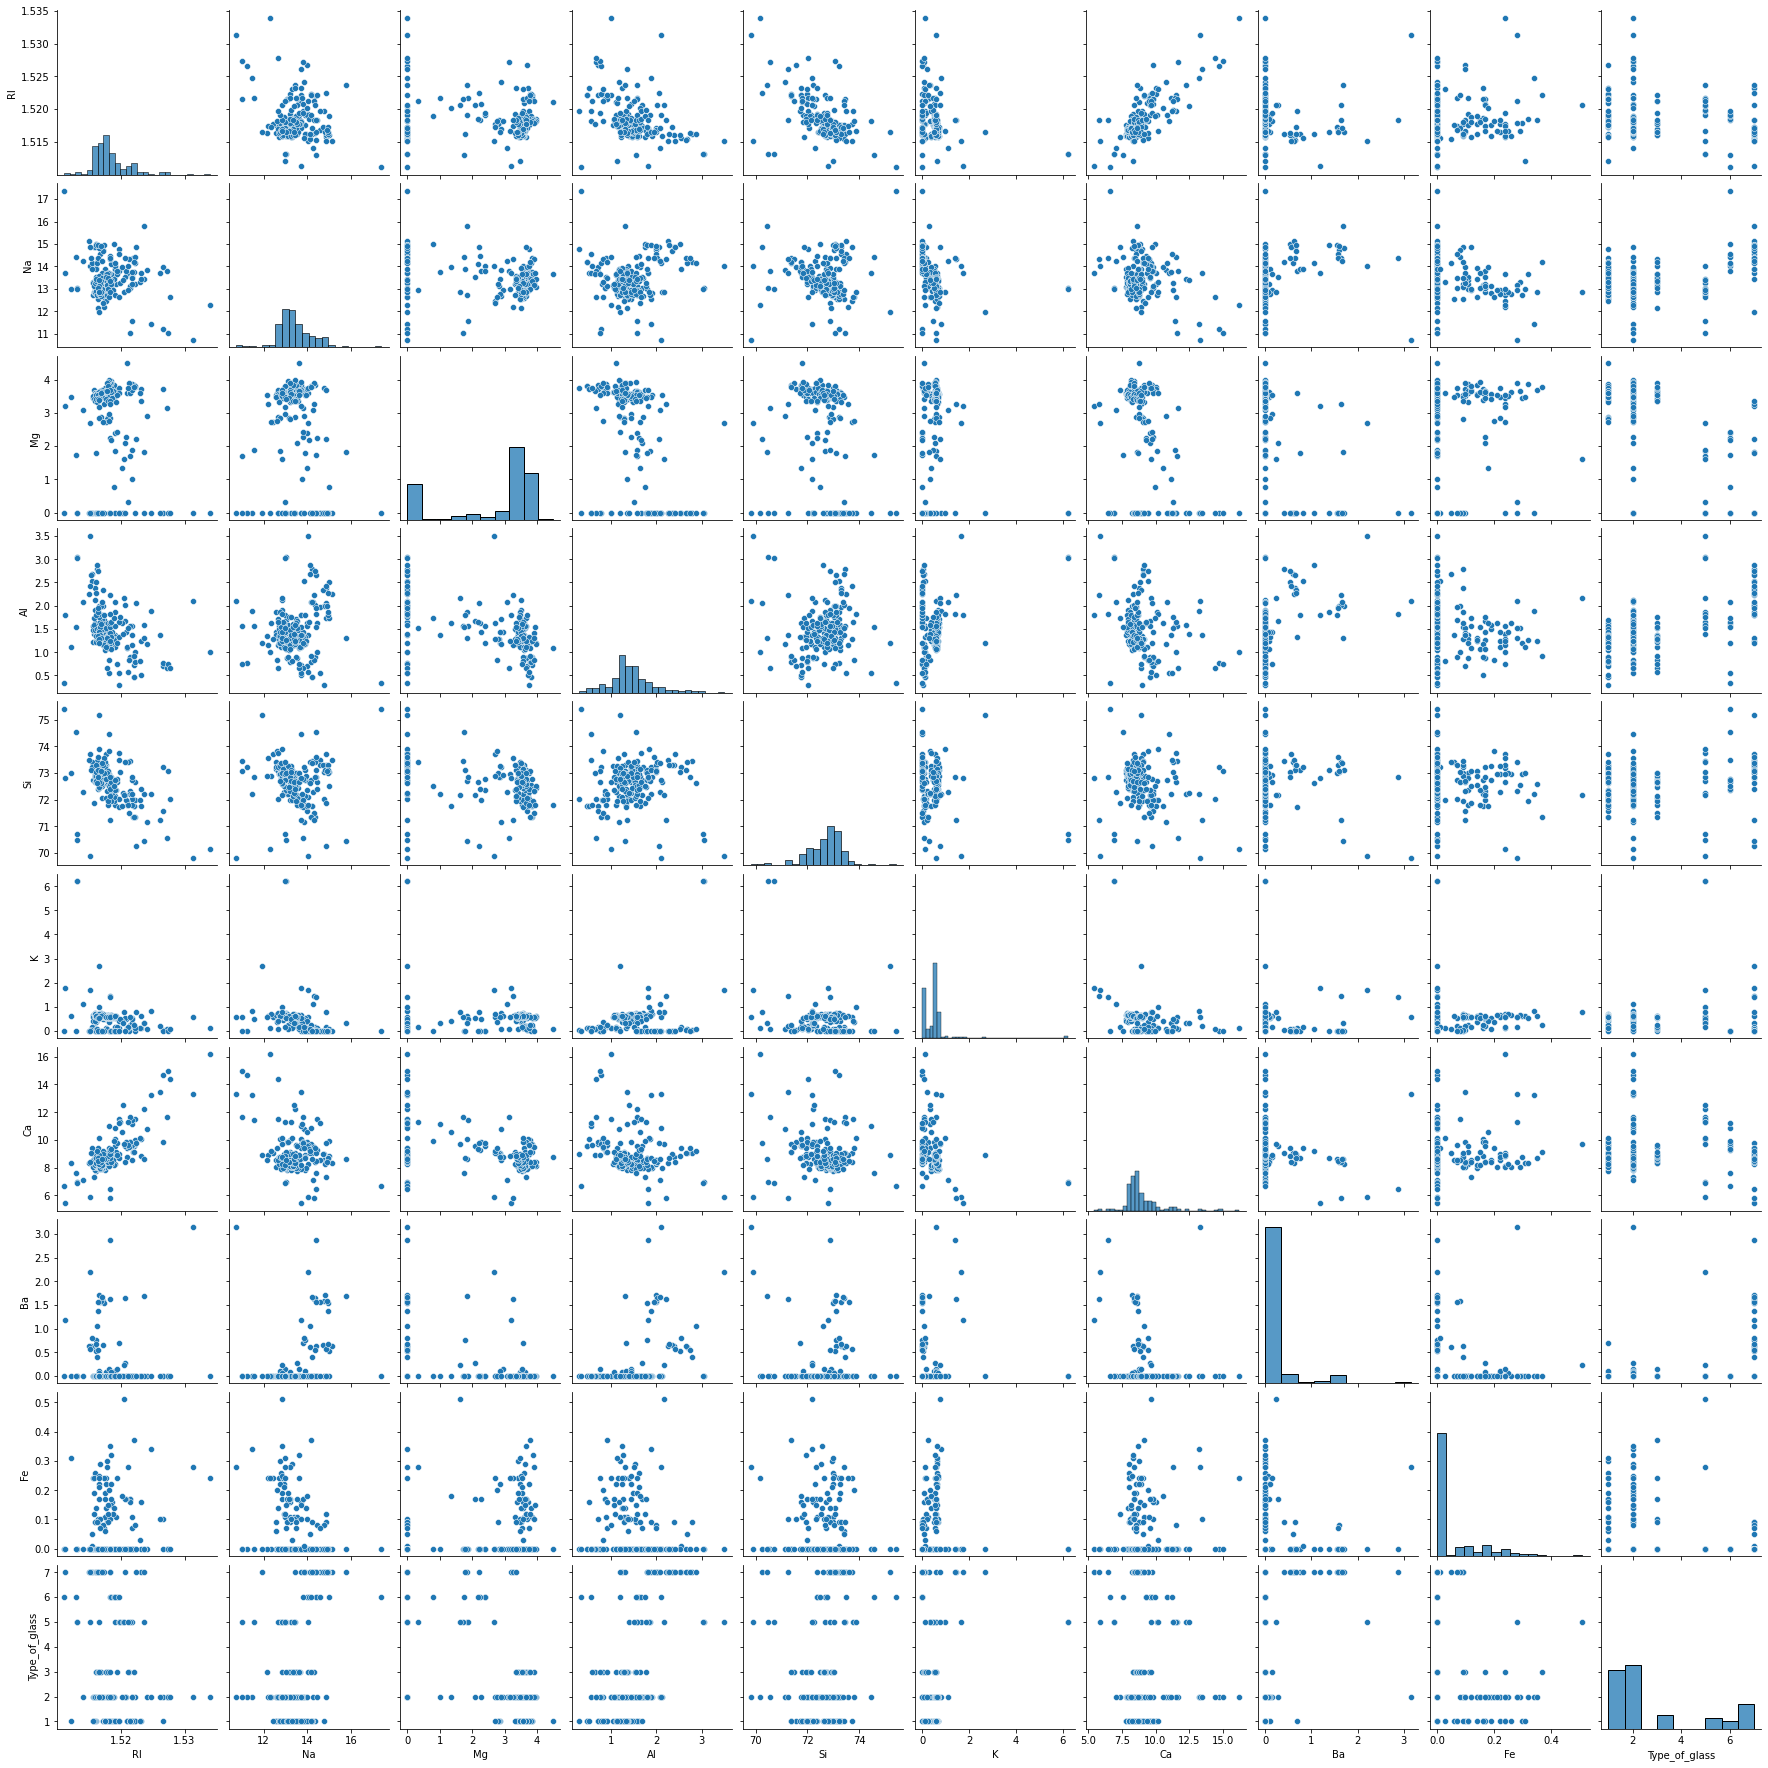

In [236]:
plt.figure(figsize = (10,10))
sns.pairplot(df1[attr])
plt.show()

In [237]:
#Checking for null-values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [238]:
#Z-score Analysis

z = abs(stats.zscore(df1))

np.where(z > 3)

data = df1[(z < 3).all(axis=1)]

data.shape
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [239]:
#Separating out the class_label
label = ['Type_of_glass']

X = data[features]

y = data[label]

In [240]:
X.shape

(194, 9)

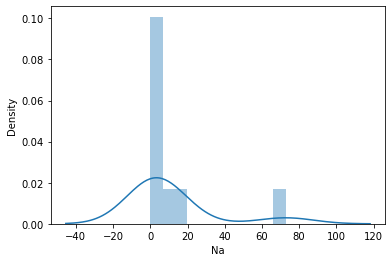

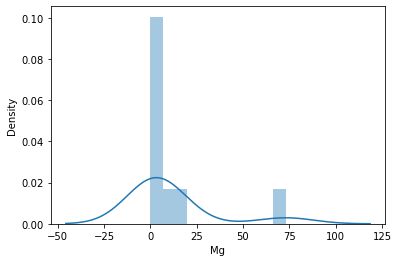

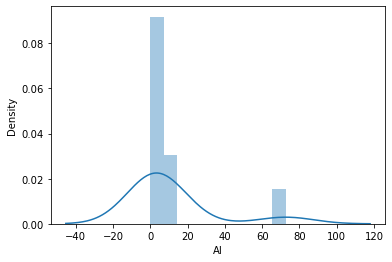

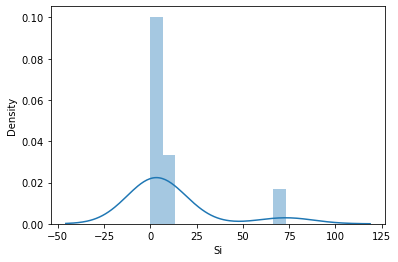

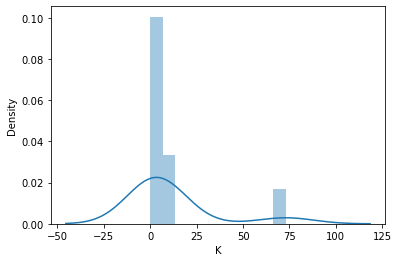

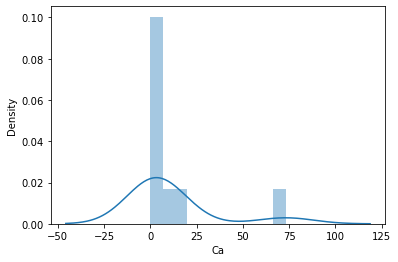

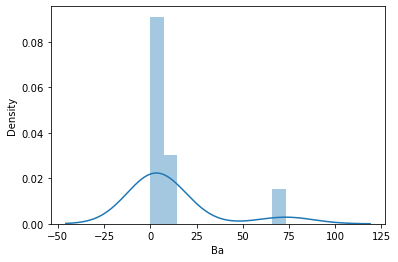

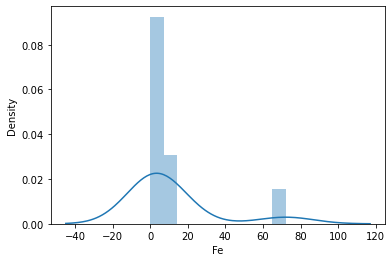

In [241]:
import warnings
warnings.filterwarnings('ignore')

x2 = X.values

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

<Figure size 576x576 with 0 Axes>

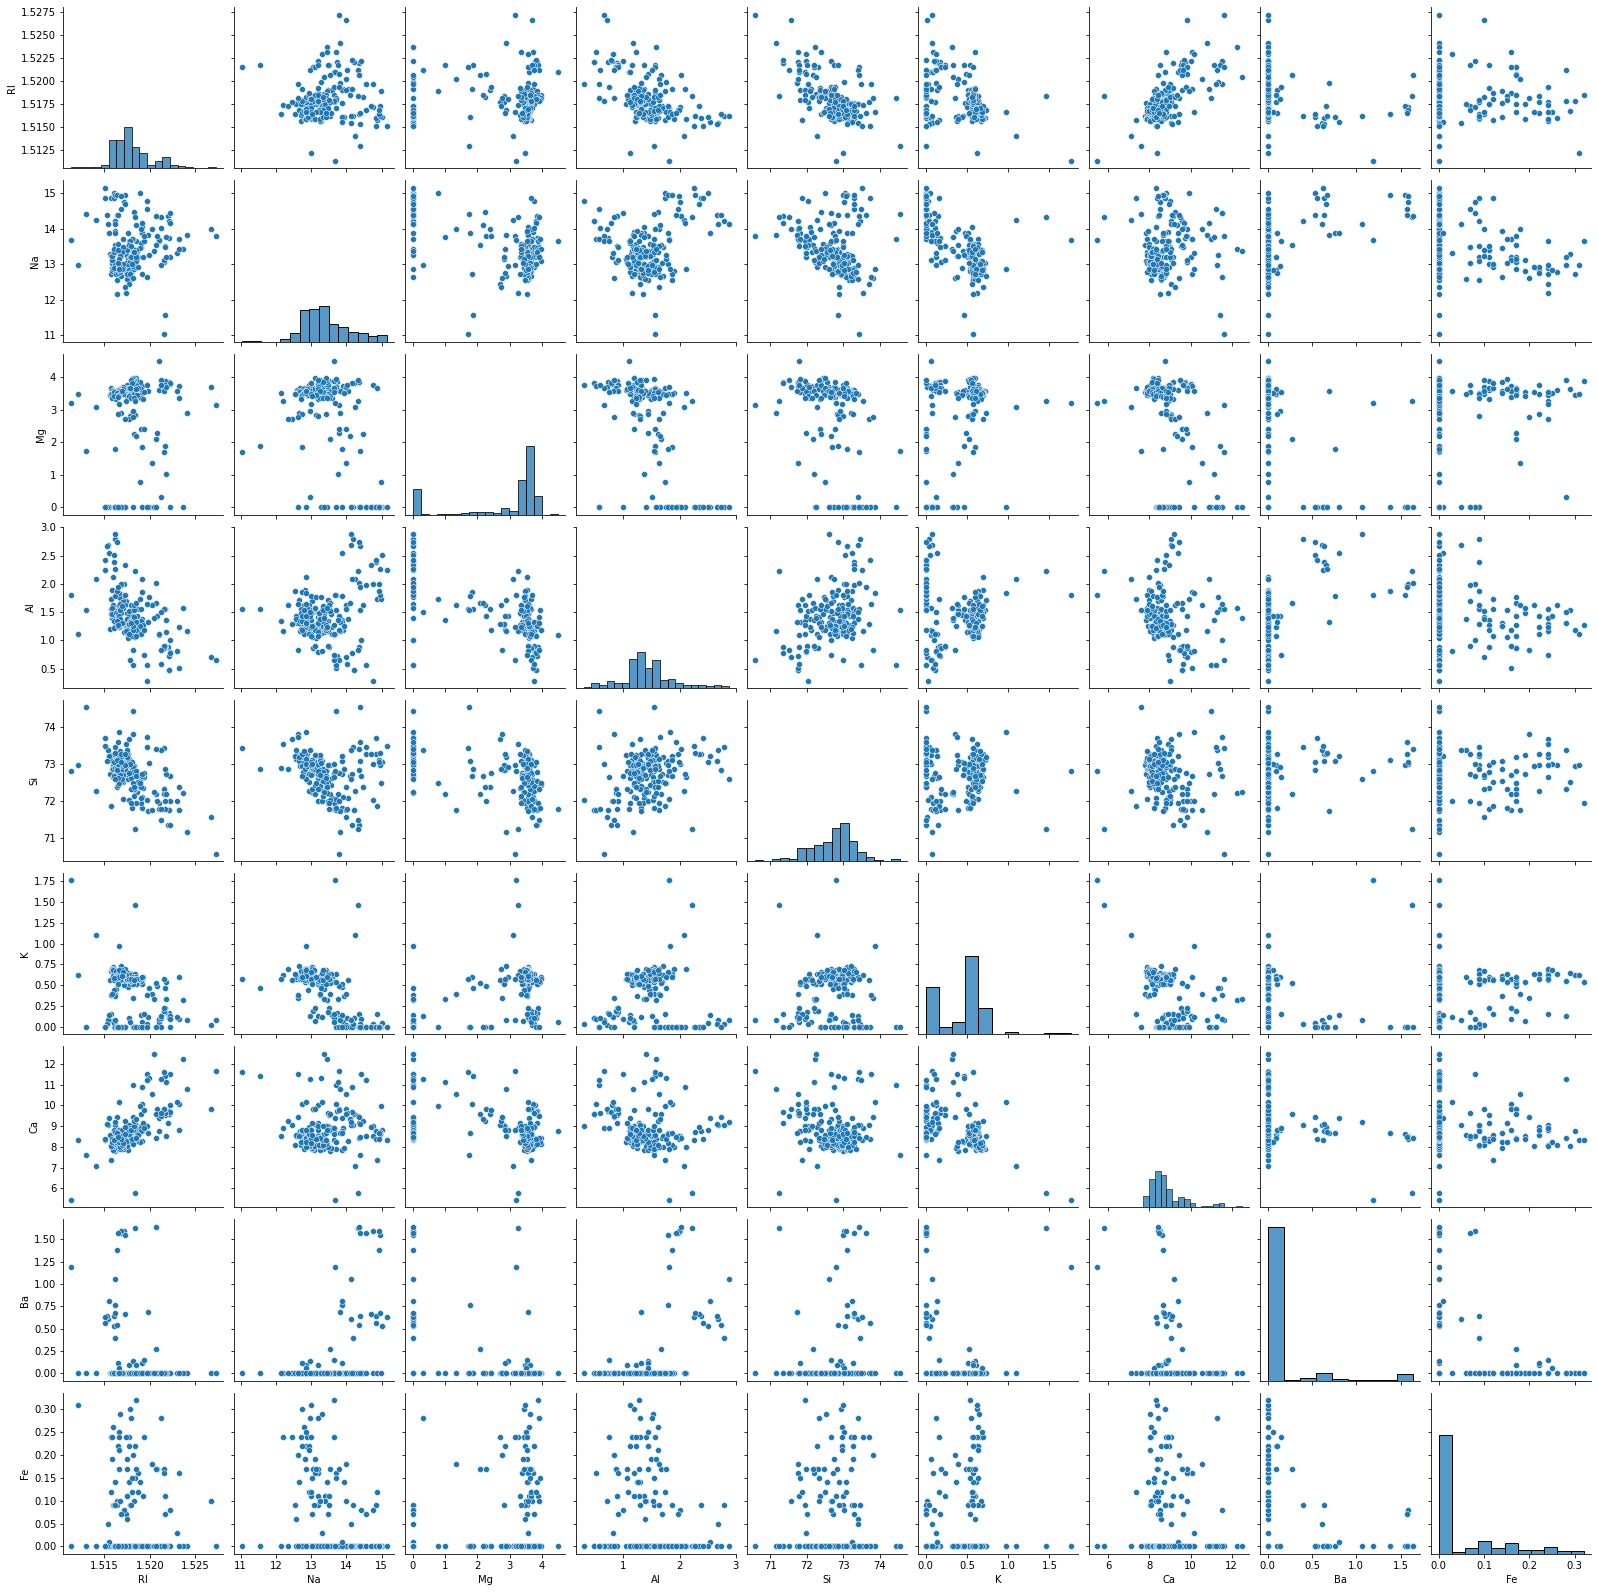

In [242]:
x2 = pd.DataFrame(X)

plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

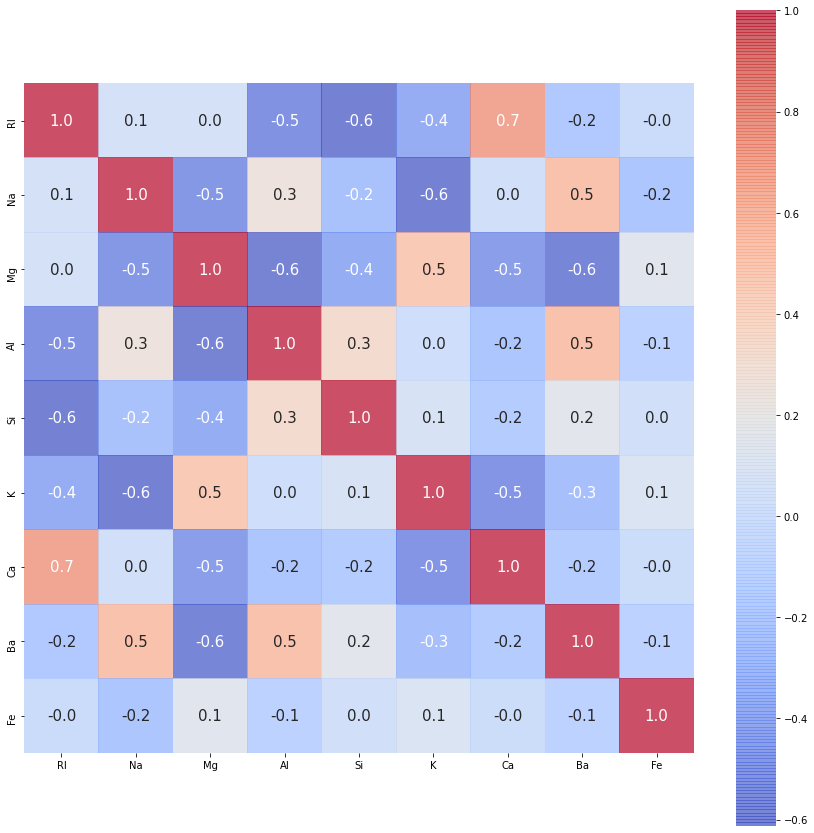

In [243]:
coreleation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

In [244]:
## normalizing/Scalling the data  

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)

In [245]:
X.head()

,0,1,2,3,4,5,6,7,8
0,0.608532,0.633495,1.000000,0.312741,0.304020,0.034091,0.469590,0.0,0.0
1,0.395232,0.694175,0.801782,0.413127,0.542714,0.272727,0.339463,0.0,0.0
2,0.305521,0.606796,0.790646,0.482625,0.608040,0.221591,0.332390,0.0,0.0
3,0.398369,0.529126,0.821826,0.386100,0.512563,0.323864,0.394625,0.0,0.0
4,0.383312,0.543689,0.806236,0.366795,0.630653,0.312500,0.373409,0.0,0.0


In [246]:
y.head()

,Type_of_glass
0,1
1,1
2,1
3,1
4,1


### Data Visualization after Data Preprocessing

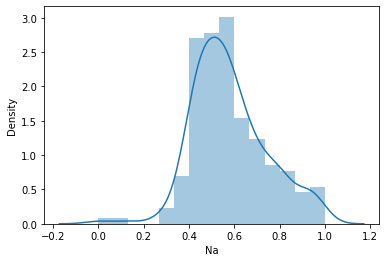

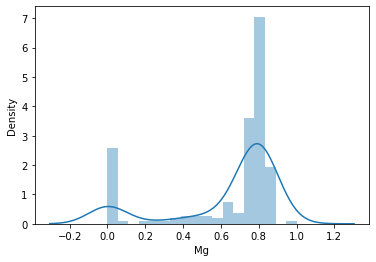

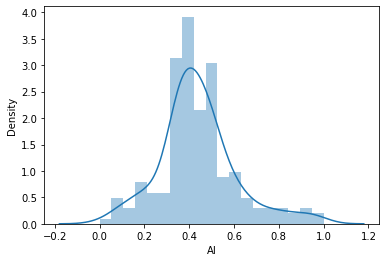

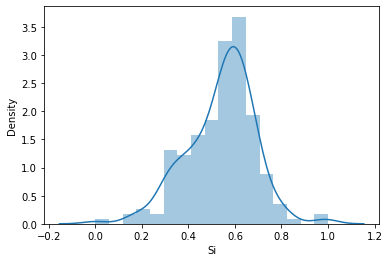

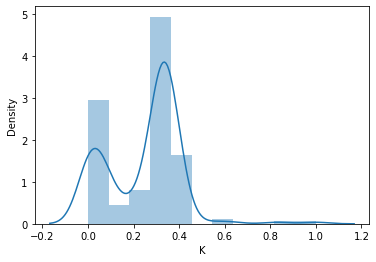

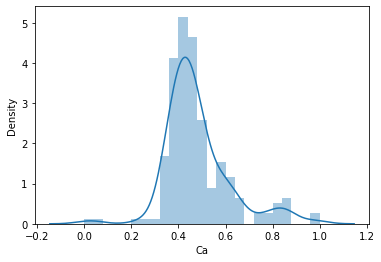

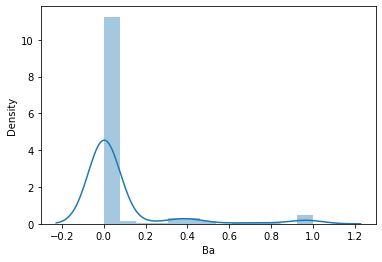

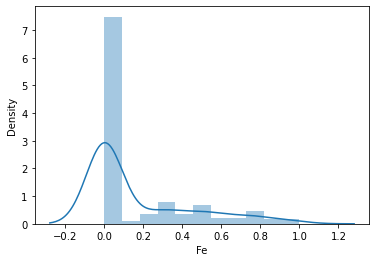

In [247]:
x2 = X

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

#### Split the data into training and testing dataset

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)

In [249]:
## Flattening the array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [250]:
#Shapes of the testing and training datasets
print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))

Shape of X_train = (145, 9)
Shape of X_test = (49, 9)
Shape of y_train = (145,)
Shape of y_test = (49,)


##### Different Algorithm to see which proves out to be the best

#### KNN Algorithm

In [251]:
Scores = []
scores=[]
for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    scores.append(score)
Scores.append(max(scores))
print(knn.score(X_train,y_train))
print(Scores)


0.6620689655172414
[0.7142857142857143]


##### Decision Tree

In [252]:

for i in range(1):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    score = tree.score(X_test,y_test)
    Scores.append(score)
print(tree.score(X_train,y_train))
print(Scores)


1.0
[0.7142857142857143, 0.5714285714285714]


#### Logistic Regression

In [253]:


for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(X_train, y_train)
    score = logistic.score(X_test,y_test)
    Scores.append(score)

print(logistic.score(X_train,y_train))
print(Scores)


0.6827586206896552
[0.7142857142857143, 0.5714285714285714, 0.6326530612244898]


#### Random Forest

In [254]:
from sklearn.ensemble import RandomForestClassifier


Range = [10,20,30,50,70,80,100,120]

for i in range(1):
    forest = RandomForestClassifier(criterion='gini', n_estimators=10, min_samples_leaf=1, min_samples_split=4, random_state=1,n_jobs=-1)
    #forest = RandomForestClassifier(n_estimators=i ,random_state=0)
    forest.fit(X_train, y_train)
    score = forest.score(X_test,y_test)
    Scores.append(score)
print(forest.score(X_train,y_train))
print(score)
print(Scores)

0.9793103448275862
0.7755102040816326
[0.7142857142857143, 0.5714285714285714, 0.6326530612244898, 0.7755102040816326]


### Hence, we could conclude after testing different algorithm that Random Forest Clssifier stands out to be the best one with an accuracy of about 77.55%.